<a href="https://colab.research.google.com/github/tranletuhien/Tu-Hien/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#cifar
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Số này là: [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


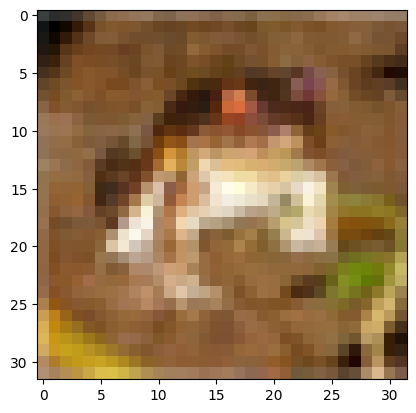

In [19]:
digit=x_train[0]
import matplotlib.pyplot as plt 
plt.imshow(digit)
plt.show
print('Số này là:',x_train[0])

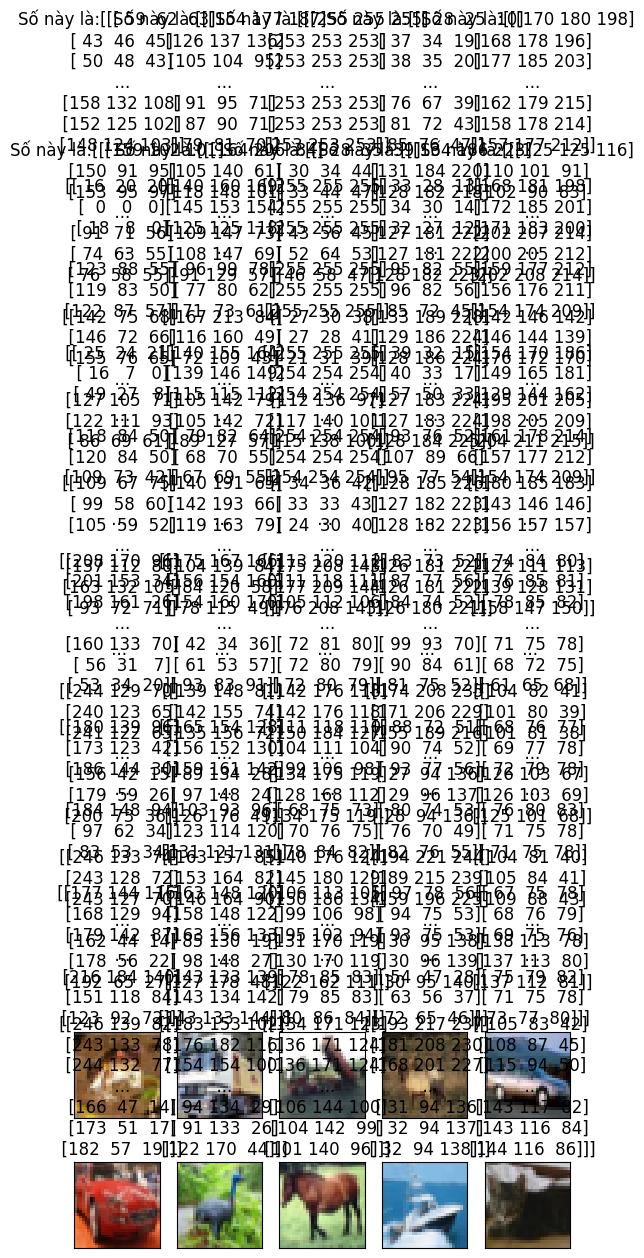

In [20]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('Số này là:{}'.format(x_train[i]))
  plt.xticks([])
  plt.yticks([])


In [7]:
from tensorflow.python import summary
from keras.models import Sequential  #sequential: mạng mô tả ANN, các lớp kế tiếp nhau; full_connected: sự kết nối đầy đủ giữa các tế bào
from keras.layers import Dense,Activation,Dropout
model=Sequential()
model.add(Dense(1000,activation='relu',input_shape=(3*32*32,),name='layer1'))
model.add(Dropout(0.2)) 
model.add(Dense(256, activation = 'relu',name='layer2'))
model.add(Dropout(0.1)) 
model.add(Dense(128, activation = 'relu',name='layer3')) 
model.add(Dropout(0.1)) 
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1000)              3073000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 layer2 (Dense)              (None, 256)               256256    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 layer3 (Dense)              (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1

In [8]:
x_train=x_train.reshape((50000,3*32*32))
x_train=x_train.astype('float32')/255

x_test=x_test.reshape((10000,3*32*32))
x_test=x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [9]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [10]:
y_train.shape
y_test.shape

(10000, 10)

In [96]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=500,batch_size=512) # epochs: số lần học
test_loss,test_acc=model.evaluate(x_test,y_test) 
print('Độ mất mát:',test_loss)
print('Độ chính xác:',test_acc)

Epoch 1/500
98/98 [==============================] - 20s 184ms/step - loss: 2.0166 - accuracy: 0.2608
Epoch 2/500
98/98 [==============================] - 17s 176ms/step - loss: 1.9156 - accuracy: 0.3061
Epoch 3/500
98/98 [==============================] - 18s 183ms/step - loss: 1.8674 - accuracy: 0.3279
Epoch 4/500
98/98 [==============================] - 18s 184ms/step - loss: 1.8243 - accuracy: 0.3433
Epoch 5/500
98/98 [==============================] - 17s 174ms/step - loss: 1.7858 - accuracy: 0.3606
Epoch 6/500
98/98 [==============================] - 17s 178ms/step - loss: 1.7579 - accuracy: 0.3714
Epoch 7/500
98/98 [==============================] - 19s 196ms/step - loss: 1.7321 - accuracy: 0.3805
Epoch 8/500
98/98 [==============================] - 17s 173ms/step - loss: 1.7012 - accuracy: 0.3941
Epoch 9/500
98/98 [==============================] - 17s 172ms/step - loss: 1.6709 - accuracy: 0.4032
Epoch 10/500
98/98 [==============================] - 18s 182ms/step - loss: 1.653

In [ ]:
model.save('/content/drive/MyDrive/cifar10.h5') #chạy xong mô hình lưu tên file đuôi.h5
#chép vô máy tính, mỗi lần chạy gọi nó ra
#model10=load_model('/content/drive/MyDrive/cifar10.h5')



In [11]:
import numpy as np


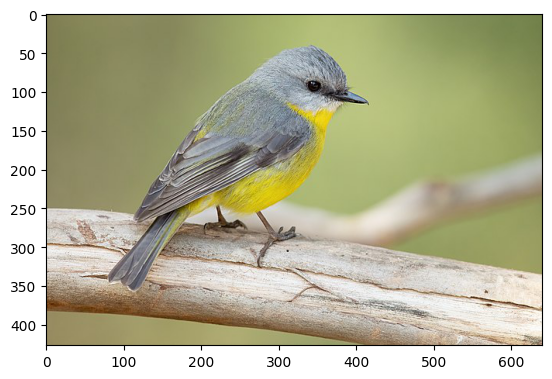

In [21]:
img=plt.imread('123.jpg')
plt.show()
plt.imshow(img)
plt.show()

In [23]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
img=load_img('123.jpg',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)


1/1 [==============================] - 0s 22ms/step


array([5])

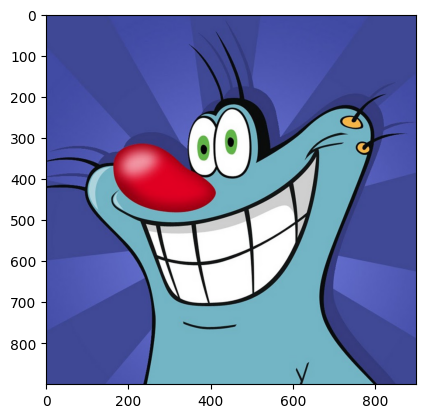

In [25]:
img=plt.imread('oggy.jpg')
plt.show()
plt.imshow(img)
plt.show()

In [26]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
img=load_img('oggy.jpg',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)


1/1 [==============================] - 0s 25ms/step


array([5])

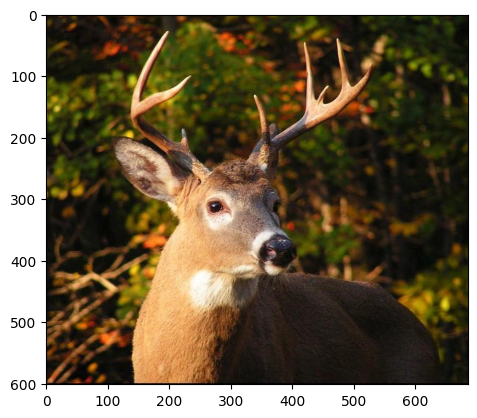

In [28]:
img=plt.imread('nai.jpg')
plt.show()
plt.imshow(img)
plt.show()

In [29]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
img=load_img('nai.jpg',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)


1/1 [==============================] - 0s 26ms/step


array([1])

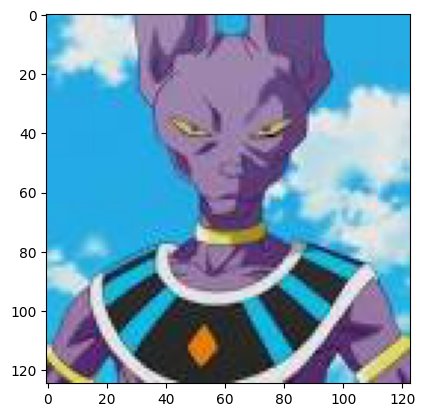

In [30]:
img=plt.imread('berus.jpg')
plt.show()
plt.imshow(img)
plt.show()

In [31]:
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
img=load_img('berus.jpg',target_size=(32,32))
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)


1/1 [==============================] - 0s 28ms/step


array([5])

In [ ]:
# làm bài tập cifar100, fashion MNIST, làm lại tất cả bài tập, boston housing